In [1]:
%cd /content/drive/MyDrive/딥러닝

/content/drive/MyDrive/딥러닝


### 목표
- 이미지 데이터를 분류하는 딥러닝 모델 설계 해보기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [3]:
# 데이터 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# X_train: 60000장의 데이터, 1장당 28 * 28

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

np.uint8(3)

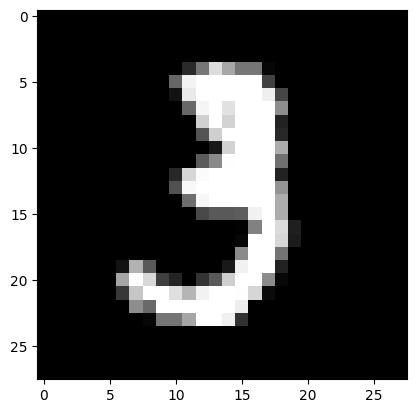

In [13]:
# 문제데이터 1ea 확인
# 정답데이터 1ea 확인
plt.imshow(X_train[10], cmap="gray")
y_train[10]

In [14]:
np.unique(y_train)  # 총 10개의 클래스

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
X_train[0][0][0]
# 0: 검정색
# 255: 흰색

np.uint8(0)

### MLP 모델링

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten

# Flatten: 다차원의 구조를 1차원으로 변경( Dense가 1차원만 입력으로 허용하기 때문)

In [23]:
# 신경망 구조 설계
model = Sequential()

# 입력층
model.add(InputLayer(shape = (28, 28)))

# 중간층
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

# 출력층
model.add(Dense(10, activation='softmax'))

In [25]:
# 학습 방법 설정
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=["accuracy"])